<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 171.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 194.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 132.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 157.8 MB/s eta 0:00:00


##### Import Necessary Modules:


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
## Write your code here
missing_data= df.isnull()
for col in missing_data.columns.values.tolist():
    if True in missing_data[col].value_counts():
        print(missing_data[col].value_counts())

RemoteWork
False    54806
True     10631
Name: count, dtype: int64
CodingActivities
False    54466
True     10971
Name: count, dtype: int64
EdLevel
False    60784
True      4653
Name: count, dtype: int64
LearnCode
False    60488
True      4949
Name: count, dtype: int64
LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64
TechDoc
False    40897
True     24540
Name: count, dtype: int64
YearsCode
False    59869
True      5568
Name: count, dtype: int64
YearsCodePro
False    51610
True     13827
Name: count, dtype: int64
DevType
False    59445
True      5992
Name: count, dtype: int64
OrgSize
False    47480
True     17957
Name: count, dtype: int64
PurchaseInfluence
False    47406
True     18031
Name: count, dtype: int64
BuyNewTool
False    45181
True     20256
Name: count, dtype: int64
BuildvsBuy
False    43358
True     22079
Name: count, dtype: int64
TechEndorse
False    43668
True     21769
Name: count, dtype: int64
Country
False    58930
True      6507
Name: count, dtyp

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



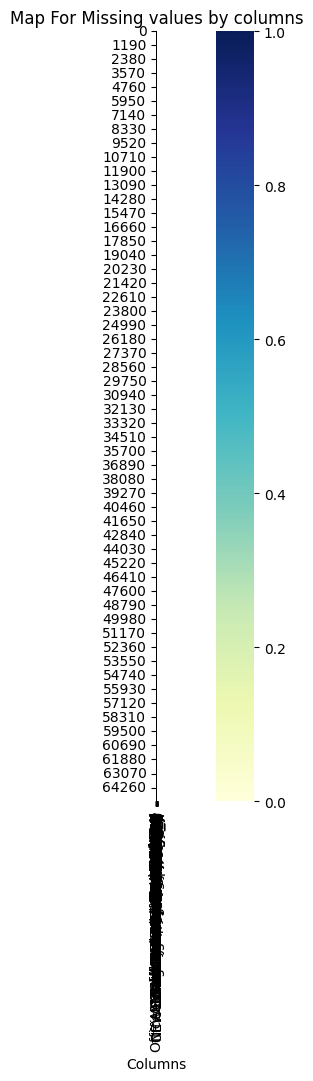

In [6]:
## Write your code here
plt.figure(figsize=(15, 10))
sns.heatmap(missing_data, cmap='YlGnBu', cbar=True, square=True, linewidths=.4, linecolor='black')
plt.title('Map For Missing values by columns')
plt.xlabel('Columns')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [11]:
## Write your code here
count_emp = df['Employment'].isnull()
print(count_emp.value_counts())

Employment
False    65437
Name: count, dtype: int64


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [12]:
## Write your code here
most_emp = df['Employment'].value_counts().idxmax()
print(most_emp)

Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [16]:
## Write your code here
df.replace({'Employment': np.nan}, {'Employment': most_emp}, inplace=True)

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


In [17]:
## Write your code here
print(df['Employment'].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
